# Computer Exercise 11: Path Planning

Honor Code:

Blah ...

Help received from:

- None

Team members:

- Kevin Walchko

In [1]:
%matplotlib inline

In [2]:
from __future__ import division, print_function
import matplotlib.pyplot as plt

In [3]:
def a_star(grid,init,goal,cost,heuristic):
    # ----------------------------------------
    # modify the code below
    # ----------------------------------------
    closed = [[0 for col in range(len(grid[0]))] for row in range(len(grid))]
    closed[init[0]][init[1]] = 1

    expand = [[-1 for col in range(len(grid[0]))] for row in range(len(grid))]
    action = [[-1 for col in range(len(grid[0]))] for row in range(len(grid))]
    
    
    delta = [[-1, 0], # go up
             [ 0,-1], # go left
             [ 1, 0], # go down
             [ 0, 1]] # go right

    x, y = init
    g = 0
    h = heuristic[x][y]
    f = g + h

    open = [[f, g, x, y]]  # add f

    found = False  # flag that is set when search is complete
    resign = False # flag set if we can't find expand
    count = 0
    
    while not found and not resign:
        if len(open) == 0:
            resign = True
            return "Fail"
        else:
            open.sort()
            open.reverse()
            next = open.pop()
            x = next[2]
            y = next[3]
            g = next[1]
            expand[x][y] = count
            count += 1
            
            if x == goal[0] and y == goal[1]:
                found = True
            else:
                # expand winning element and add to new open list
                for i in range(len(delta)):
                    x2 = x + delta[i][0]
                    y2 = y + delta[i][1]
                    # make sure still on map
                    if x2 >= 0 and x2 < len(grid) and y2 >=0 and y2 < len(grid[0]):
                        # make sure unoccuppied
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost
                            h2 = heuristic[x2][y2]
                            f2 = g2 + h2
                            open.append([f2, g2, x2, y2])
                            closed[x2][y2] = 1

    return expand

In [4]:
def calcHeuristic(grid, goal):
    """
    Basically calculates a gradient decent from a given
    goal point.
    """
    w = len(grid[0])  # width
    h = len(grid)     # height
    hr = [[(abs(goal[1]-y)+abs(goal[0]-x)) for y in range(w)] for x in range(h)]
    return hr

In [12]:
from __future__ import division, print_function
import matplotlib.pyplot as plt

def putPathMap(grid, path, clear=0, closed=2, travel=1):
    # copy map
    ret = [[(clear if grid[col][row] == 0 else closed) for row in range(len(grid[0]))] for col in range(len(grid))]
    
    # plot path on map
    for x, y in path:
        ret[x][y] = travel
    return ret


# make pretty plots
def matShow(grid, title=None, cmap=None, path=None):
    if path:
        path = putPathMap(path)
    rows = len(grid)
    cols = len(grid[0])
    
    colorbar = True
    if cmap is None:
        cmap = 'binary'
        colorbar = False
    plt.matshow(grid, cmap=plt.get_cmap(cmap))
    if title:
        plt.title(title + ' [{} x {}]'.format(rows, cols))
    else:
        plt.title('[{} x {}]'.format(rows, cols))
    plt.xticks(())
    plt.yticks(());
    if colorbar:
        plt.colorbar();

        
def getPath(expand, goal, start, wall=-1):
    path = []
    x, y = goal
    val = expand[x][y]
    delta = [
        [-1, 0 ], # go up
        [ 0, -1], # go left
        [ 1, 0 ], # go down
        [ 0, 1 ]  # go right
    ]
    done = False
    max_x_grid = len(grid)
    max_y_grid = len(grid[0])
    
    path.append(goal)
    
    while not done:
        vals = []
        for move in delta:
            x2, y2 = x + move[0], y + move[1]
            # make sure still on map
            if x2 >= 0 and x2 < max_x_grid and y2 >=0 and y2 < max_y_grid:
                if expand[x2][y2] > wall:  # don't travel through walls
                    val = expand[x2][y2]
                    vals.append((val, move))

        lowest = 100000
        for v, m in vals:
            if v < lowest:
                move = m
                lowest = v

        x, y = x + move[0], y + move[1]
        path.append([x, y])
        
        if x == start[0] and y == start[1]:
            done = True
        
    return path

------------------------------------------------------------
start [0, 0]
goal [5, 8]


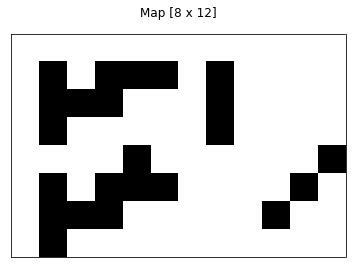

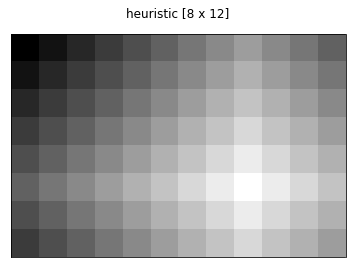

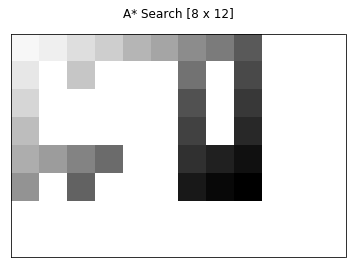

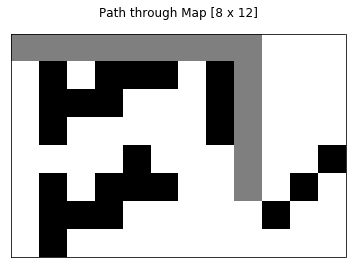

In [11]:
grid = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

matShow(grid, 'Map')

cost = 1
init = [0,0]
goal = [5,8]
heuristic = calcHeuristic(grid, goal)
matShow(heuristic, 'heuristic')


# go back to the preivous simple search
# h_empty = [[0 for row in range(len(grid[0]))] for col in range(len(grid))]
# heuristic = h_empty

ans = a_star(grid,init,goal,cost,heuristic)
matShow(ans, 'A* Search')
print('-'*60)
print('start', init)
print('goal', goal)
path = getPath(ans, goal, init)
ans = putPathMap(grid, path)
matShow(ans, 'Path through Map')

1. Did A Star search the entire map? No
2. What happens if you set the heuristic to all 0's? It acts like the simple search and bruit for wanders through the map until it finds the end.
3. Plot the path through the map using a heuristic of all 0's. See below
4. Now test what happens when you set the heuristic to a random number. Use random.randint(0,50) to randomly pick your heuristic value. See below

------------------------------------------------------------
start [0, 0]
goal [5, 8]


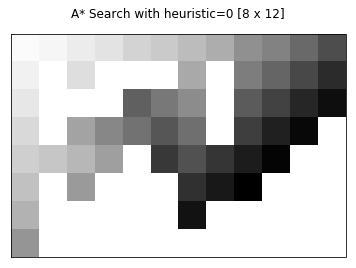

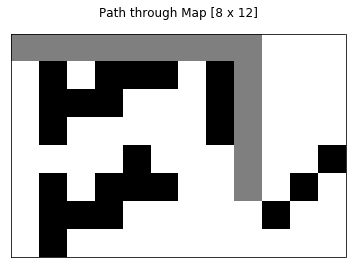

In [22]:
# go back to the preivous simple search
h_empty = [[0 for row in range(len(grid[0]))] for col in range(len(grid))]
heuristic = h_empty

ans = a_star(grid,init,goal,cost,heuristic)
matShow(ans, 'A* Search with heuristic=0')
print('-'*60)
print('start', init)
print('goal', goal)
path = getPath(ans, goal, init)
ans = putPathMap(grid, path)
matShow(ans, 'Path through Map')

------------------------------------------------------------
start [0, 0]
goal [5, 8]


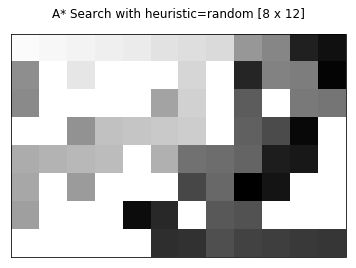

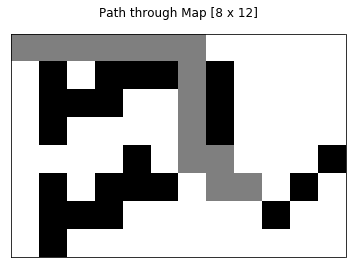

In [25]:
# go back to the preivous simple search
import random
h_empty = [[random.randint(0,50) for row in range(len(grid[0]))] for col in range(len(grid))]
heuristic = h_empty

ans = a_star(grid,init,goal,cost,heuristic)
matShow(ans, 'A* Search with heuristic=random')
print('-'*60)
print('start', init)
print('goal', goal)
path = getPath(ans, goal, init)
ans = putPathMap(grid, path)
matShow(ans, 'Path through Map')